## Logits

In [2]:
import numpy as np
np.random.seed(42)

logits = np.random.randn(5)
logits

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

## Inside the Linear Layer

$$\hat{x}_{i+1} = \sigma(\mathbf{w}_i^T \mathbf{x} + b_i)$$

## Simulate the Linear Layer

In [3]:
W = np.random.randn(5, 5)
x = np.random.randn(5)
b = np.ones(5)

x_1 = W @ x + b
x_1

array([ 4.99851316,  1.01778965, -0.74321057,  0.75818997, -0.80840313])

## Sigmoid

$$\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{x}}}$$

## Sigmoid Derivative

$$\sigma'(\mathbf{x}) = \sigma(\mathbf{x}) \cdot (1 - \sigma(\mathbf{x}))$$

In [4]:
import numpy as np


class Sigmoid:
    r"""Sigmoid function and its derivative for backpropagation."""

    def forward(self, x: np.ndarray):
        r"""
        Compute the Sigmoid of the input.
        $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

        Args:
            x (np.ndarray): Input array, typically the weighted sum of inputs to a neuron.

        Returns:
            np.ndarray: Sigmoid-transformed values.
        """

        return 1 / (1 + np.exp(-x))

    def backward(self, x: np.ndarray):
        r"""
        Compute the derivative of the sigmoid.
        
        $$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

        Args:
            x (np.ndarray): Input array, typically the weighted sum of inputs to a neuron.

        Returns:
            np.ndarray: Derivative of the sigmoid with respect to the input.
        """

        sig = self.forward(x)
        
        # Derivative of the Sigmoid function: sigmoid * (1 - sigmoid)
        ds = sig * (1 - sig)
        return ds

## Sigmoid and derivative plot

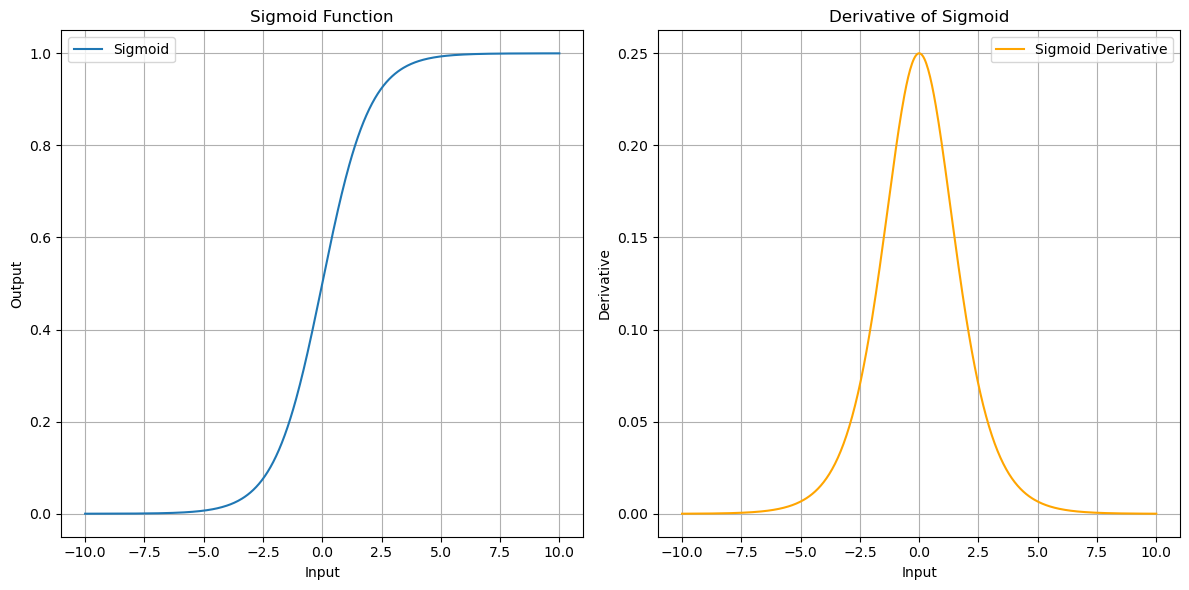

In [5]:
import numpy as np
import matplotlib.pyplot as plt


sigmoid = Sigmoid()

# Generate an array of values for x
x = np.linspace(-10, 10, 500)

# Compute the sigmoid and its derivative
sigmoid_values = sigmoid.forward(x)
sigmoid_derivatives = sigmoid.backward(x)

# Plot the sigmoid and its derivative
plt.figure(figsize=(12, 6))

# Plot sigmoid
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_values, label='Sigmoid')
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

# Plot derivative of sigmoid
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivatives, label='Sigmoid Derivative', color='orange')
plt.title('Derivative of Sigmoid')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Logits VS Probs

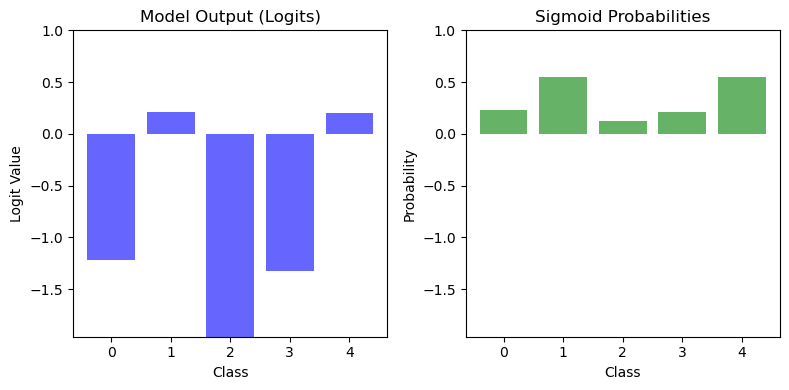

Logits: [-1.22084365  0.2088636  -1.95967012 -1.32818605  0.19686124]
Probabilities: [0.22778802 0.5520269  0.12350275 0.20945957 0.54905698]


In [6]:
def generate_logits(num = 5):
    return np.random.randn(num)


sigmoid = Sigmoid()


def plot_logits(num_classes=5):
    logits = generate_logits(num_classes)
    # Convert logits to probabilities
    probabilities = sigmoid.forward(logits)

    # Determine the shared y-axis range
    max_y = max(max(logits), 1.0)  # Probabilities are always <= 1
    min_y = min(min(logits), 0.0)  # Probabilities are always >= 0

    # Visualization of the sigmoid transformation
    plt.figure(figsize=(8, 4))

    # Plot logits
    plt.subplot(1, 2, 1)
    plt.bar(range(len(logits)), logits, color='blue', alpha=0.6)
    plt.title('Model Output (Logits)')
    plt.xlabel('Class')
    plt.ylabel('Logit Value')
    plt.ylim(min_y, max_y)

    # Plot probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(len(probabilities)), probabilities, color='green', alpha=0.6)
    plt.title('Sigmoid Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.ylim(min_y, max_y)

    plt.tight_layout()
    plt.show()

    # Print the probabilities
    print("Logits:", logits)
    print("Probabilities:", probabilities)

plot_logits()

In [7]:
from ipywidgets import interact, IntSlider

interact(
    plot_logits,
    steps=IntSlider(min=2, max=10, step=1, value=5, description='Steps')
)

interactive(children=(IntSlider(value=5, description='num_classes', max=15, min=-5), Output()), _dom_classes=(…

<function __main__.plot_logits(num_classes=5)>

## Logits to Probabilities

In [8]:
W = np.random.randn(5, 5)
x = np.random.randn(5)
b = np.ones(5)

x_1 = W @ x + b
sigmoid.forward(x_1)

array([0.99423321, 0.23240206, 0.12126777, 0.03169667, 0.97338522])